In [1]:
import batoid
from copy import copy
from batoid.utils import normalized
from batoid.coating import SimpleCoating
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
batoid.datadir = '/home/bregeon/LSST/CCOB/batoid/batoid/data'
print('Version', batoid.__version__)
print('Module', batoid.__file__)

Version 0.1.0
Module /home/bregeon/data/Soft/miniconda3/envs/batoid/lib/python3.7/site-packages/batoid-0.1.0-py3.7-linux-x86_64.egg/batoid/__init__.py


In [2]:
fiducial_telescope = batoid.Optic.fromYaml("LSST_CCOB_r.yaml")
for key,opt in fiducial_telescope.itemDict.items():
#    if key.find('entrance')>0 or key.find('exit')>0:
    if key.find('L1_exit')>0 or key.find('L2_entrance')>0:
        opt.forwardCoating = SimpleCoating(reflectivity=0.5, transmissivity=0.5)
        opt.reverseCoating = SimpleCoating(reflectivity=0.5, transmissivity=0.5)

        print('Forward Coating ', opt.name, ' with a ', opt.forwardCoating)
        print('Reverse Coating ', opt.name, ' with a ', opt.reverseCoating)     

Forward Coating  L1_exit  with a  SimpleCoating(0.5, 0.5)
Reverse Coating  L1_exit  with a  SimpleCoating(0.5, 0.5)
Forward Coating  L2_entrance  with a  SimpleCoating(0.5, 0.5)
Reverse Coating  L2_entrance  with a  SimpleCoating(0.5, 0.5)


source  RayVector([Ray([0.2,0,0],[0,0,0.999723], wavelength=5e-07)], wavelength=5e-07)
--- traceSplit ---
traceSplit        LSST            flux =         1.00000000   nphot =          1
traceSplit        LSSTCamera      flux =         1.00000000   nphot =          1
traceSplit        L1              flux =         1.00000000   nphot =          1
traceSplit        L1_entrance     flux =         1.00000000   nphot =          1
traceSplit        L1_exit         flux =         1.00000000   nphot =          1
traceSplitReverse L1_entrance     flux =         0.50000000   nphot =          1
traceSplit        L2              flux =         0.50000000   nphot =          1
traceSplit        L2_entrance     flux =         0.50000000   nphot =          1
traceSplit        L2_exit         flux =         0.25000000   nphot =          1
traceSplit        Filter          flux =         0.25000000   nphot =          1
traceSplit        Filter_entrance flux =         0.25000000   nphot =          1
tra

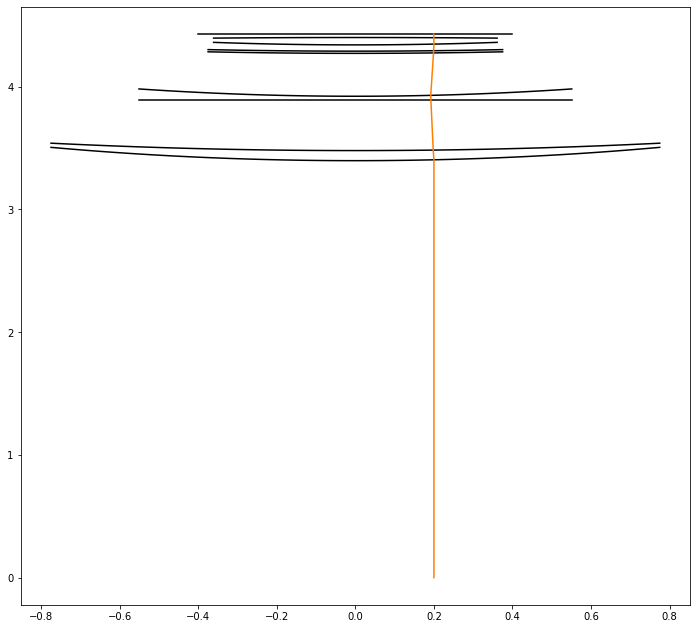

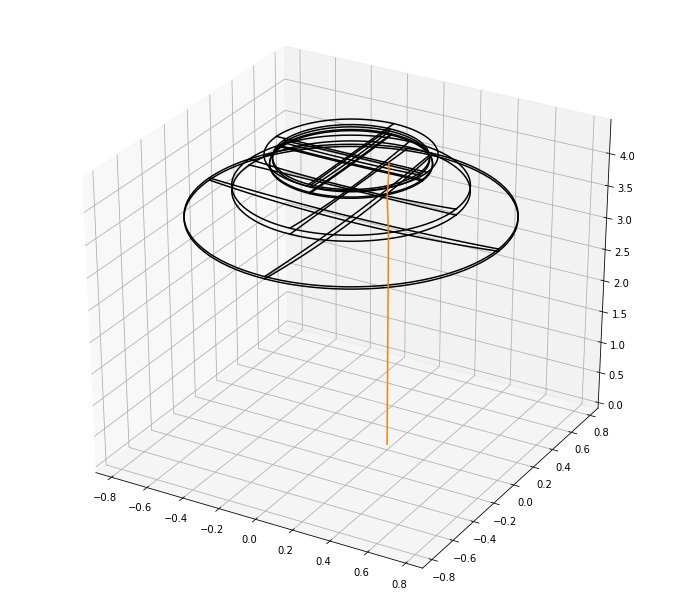

In [3]:
fig1 = plt.figure(figsize=(12, 11))
ax1 = fig1.add_subplot(111)
fiducial_telescope.draw2d(ax1, c='k')

fig2 = plt.figure(figsize=(12, 11))
ax2 = fig2.add_subplot(111, projection='3d')
fiducial_telescope.draw3d(ax2, c='k')

c = '#ff7f00'
rays = []

for dx in range(0, 6, 1):
    p0 = np.array([dx/10., 0, 0])
    v = normalized(np.array([0, 0, 1]))/1.000277
    ray = batoid.Ray(p0, v, t=0, wavelength=500e-9)
    p0 = ray.positionAtTime(0)
    rays.append(batoid.Ray(p0, v, t=0, wavelength=500e-9))

for dvx in range(0, 6, 1):
    p0 = np.array([-dvx/30., 0, 0])
    v = normalized(np.array([-dvx/50, 0., 1]))/1.000277
    ray = batoid.Ray(p0, v, t=0, wavelength=500e-9)
    p0 = ray.positionAtTime(0)
    rays.append(batoid.Ray(p0, v, t=0, wavelength=500e-9))

# first traceFull
r_vec = batoid.RayVector(rays[2:3])
print('source ', r_vec)
traceFull = fiducial_telescope.traceFull(r_vec)
batoid.drawTrace2d(ax1, traceFull, c=c)
batoid.drawTrace3d(ax2, traceFull, c=c)    

# now traceSplit
print('--- traceSplit ---')
traceSplit = fiducial_telescope.traceSplit(r_vec, minFlux=0.001, _verbose=True)
forwards = traceSplit[0]
backwards = traceSplit[1]
print('forward rays: ')
for ray in forwards:
    print(ray)
print('backward rays: ')
for ray in backwards:
    print(ray)


In [4]:
z1 = fiducial_telescope.itemDict['LSST.LSSTCamera.L1'].coordSys.origin[2]
z2 = fiducial_telescope.itemDict['LSST.LSSTCamera.L2'].coordSys.origin[2]
zF = fiducial_telescope.itemDict['LSST.LSSTCamera.Filter'].coordSys.origin[2]
z3 = fiducial_telescope.itemDict['LSST.LSSTCamera.L3'].coordSys.origin[2]
zD = fiducial_telescope.itemDict['LSST.LSSTCamera.Detector'].coordSys.origin[2]
print('z1 = %.3f'%z1)
print('z2 = %.3f'%z2)
print('zF = %.3f'%zF)
print('z3 = %.3f'%z3)
print('zD = %.3f'%zD)

z1 = 3.397
z2 = 3.892
zF = 4.272
z3 = 4.341
zD = 4.429


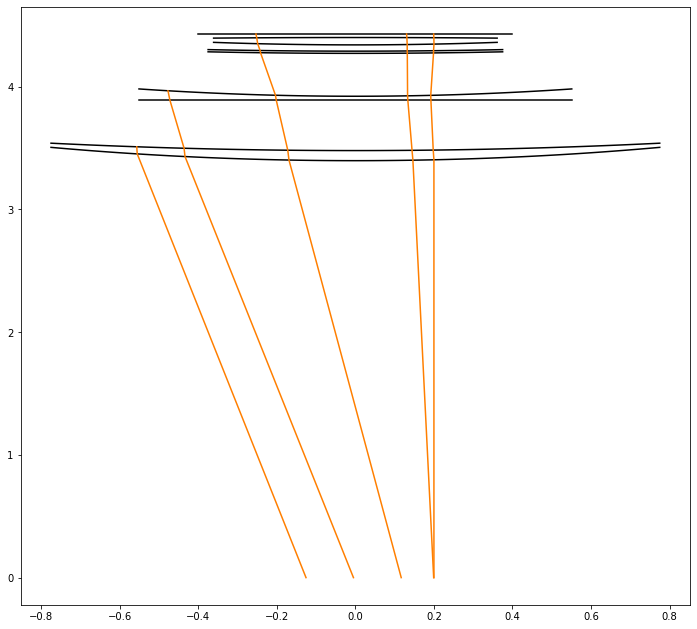

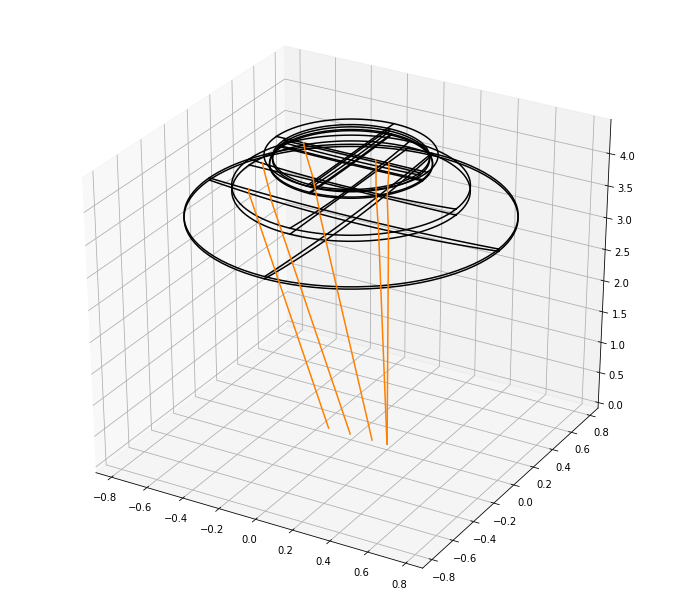

In [5]:
fig1 = plt.figure(figsize=(12, 11))
ax1 = fig1.add_subplot(111)
fiducial_telescope.draw2d(ax1, c='k')

fig2 = plt.figure(figsize=(12, 11))
ax2 = fig2.add_subplot(111, projection='3d')
fiducial_telescope.draw3d(ax2, c='k')

c = '#ff7f00'

# invert ray of interest and traceFull it
#bk_list = list()
#for bk in backwards:
#    bray = bk.copy()
#    p0 = np.array([bray.x, bray.y, bray.z])
#    v = np.array([bray.vx, bray.vy, bray.vz])
#    bk_list.append(batoid.Ray(p0, -v, t=0, wavelength=500e-9))

#back_vec = batoid.RayVector([forwards[0]] + bk_list)
#print('back source ')
#for ray in back_vec:
#    print(ray)
#traceFull = fiducial_telescope.traceFull(back_vec)

allfwd = batoid.RayVector(list(forwards)+list(r_vec))
traceFull = fiducial_telescope.traceFull(allfwd)

batoid.drawTrace2d(ax1, traceFull, c=c)
batoid.drawTrace3d(ax2, traceFull, c=c)    


In [ ]:
bk.coordSys

